# Perceptron Classifier
Perceptron is the most basic classifier for *binary classification*.  It's a *linear classifier* defined as
$$
\huge
\eqalign{
h(x; \theta) &= \text {sign}(\theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n + \theta_0)\\
	&= \text {sign}(\theta\cdot x + \theta_0) = \cases{
		+1  & if $ \theta \cdot x + \theta_0 \ge 0$ \\
		-1 & if $ \theta \cdot x + \theta_0 < 0$
	} \\
}
$$
where:
$$
\huge
\eqalign {
&x = (x_1, x_2, \dots, x_n) \rightarrow \text {Inputs (a vector)}\\
&\theta = (\theta_1, \theta_2, \dots, \theta_n) \rightarrow \text {Weights assigned to each feature}\\
&\theta_0 \rightarrow \text {Bias term (helps shift the decision bourndary)}\\
}
$$

$\huge \text {sign}$ function of the inner product between the parameter $\huge \theta$ and input $\huge x$ maps to $\huge \pm 1$ labels. Geometrically, $\huge \theta \cdot x + \theta_0 = 0$ describes a hyperplane in a $\huge n$-dimensional space uniquely determined by the normal vector $\huge \theta$. Any point that lines on the same side as normal vector $\huge \theta$ is labeled $\huge +1$, while any point on the opposite side is labeled $\huge -1$. As a result, $\huge \theta \cdot x + \theta_0$ represents a *decision boundary*.

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [122]:
class Perceptron:
    def __init__(self):
        self.theta = None
        self.bias = None

    def fit(self, X, y, epoch=5):
        """
        Args:
            X: Data
            y: labels
            dim: Dimension of data
            epoch: num of times to run the loop
        """

        n = X.shape[0]
        dim = X.shape[1]

        self.theta = np.zeros(dim)
        self.bias = 0
        k = 1

        for _ in range(epoch):
            for i in range(n):
                idx = randint.rvs(0, n-1, size=1)[0]
                if y[idx] * (np.dot(self.theta, X[idx, :]) + self.bias) <= 0:
                    eta = 1 / (k + 1)
                    self.theta = self.theta + eta * y[idx] * X[idx, :]
                    self.bias = self.bias + eta * y[idx]

        return self

    def predict(self, X_test):
        n = X_test.shape[0]

        y_pred = np.zeros(n)
        for idx in range(n):
            y_pred[idx] = np.sign(np.dot(self.theta, X_test[idx, :]) + self.bias)

        y_pred[y_pred == 0] = -1

        return y_pred

    def confusion_matrix(self, y_true, y_pred):
        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for idx in range(y_pred.shape[0]):
            if y_pred[idx] == 1 and y_test[idx] == 1:
                tp += 1
            if y_pred[idx] == 1 and y_test[idx] == -1:
                fp += 1
            if y_pred[idx] == -1 and y_test[idx] == -1:
                tn += 1
            if y_pred[idx] == -1 and y_test[idx] == 1:
                fn += 1

        return np.array([ [tn, fp], [fn, tp] ])

In [92]:
iris = load_iris()
X = iris.data[:100, :]
y = 2 * iris.target[:100] - 1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
clf = Perceptron().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [124]:
cmt = clf.confusion_matrix(y_test, y_pred)
cmt

array([[12,  0],
       [ 0,  8]])

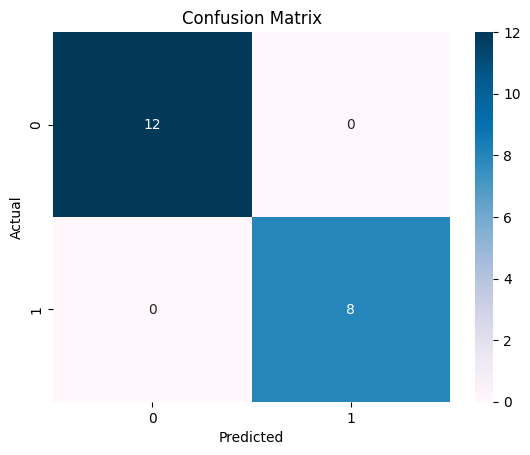

In [131]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()